# 🧹 Day 2: Outlier Handling & Log Transformation

## 📌 Objective:
- Detect and visualize outliers
- Apply log transformation to skewed features (e.g., `SalePrice`, `GrLivArea`)
- Save a cleaned and transformed version of the dataset for modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("../data/train.csv")
df.shape


(1460, 81)

## 📊 Visualizing SalePrice

We'll check the distribution and apply log transformation if it's right-skewed.


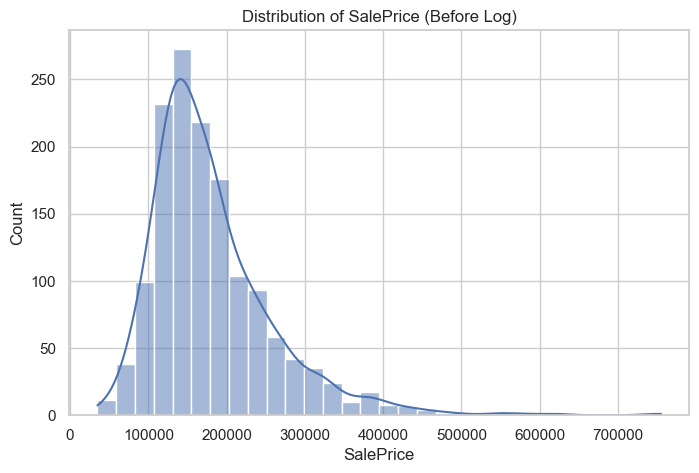

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice (Before Log)")
plt.show()


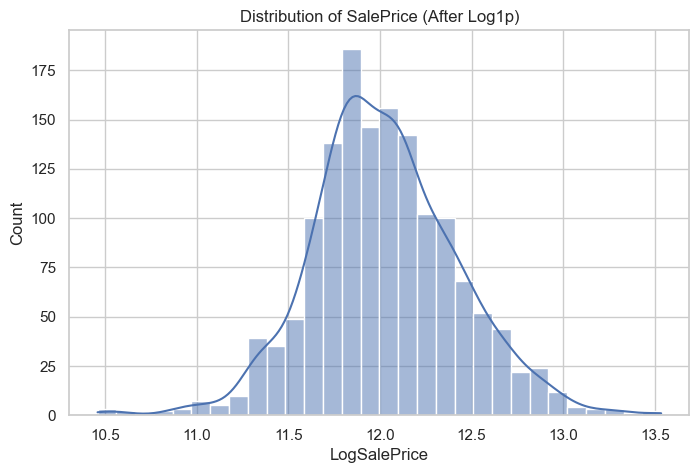

In [3]:
df['LogSalePrice'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(8, 5))
sns.histplot(df['LogSalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice (After Log1p)")
plt.show()


## 🏠 Analyzing GrLivArea (Square Footage)

Check for extreme values and how they impact SalePrice.


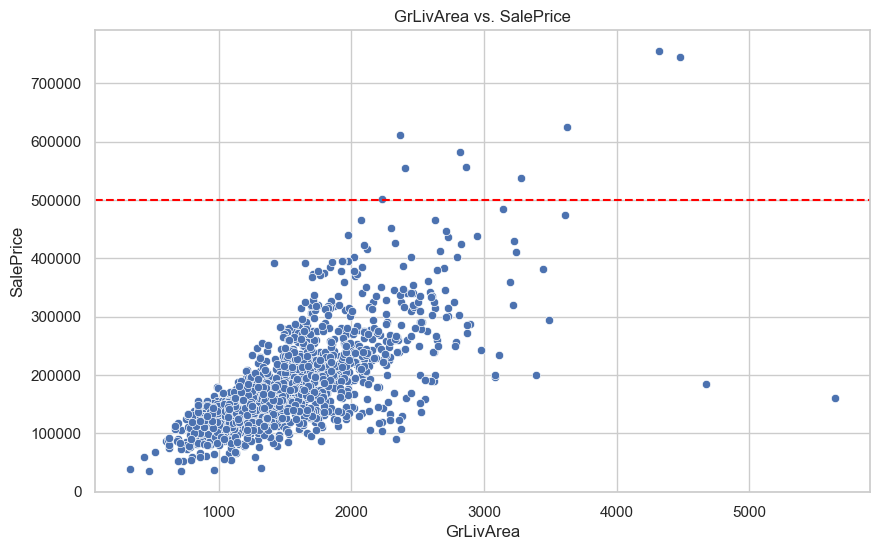

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.axhline(y=500000, color='red', linestyle='--')
plt.title("GrLivArea vs. SalePrice")
plt.show()


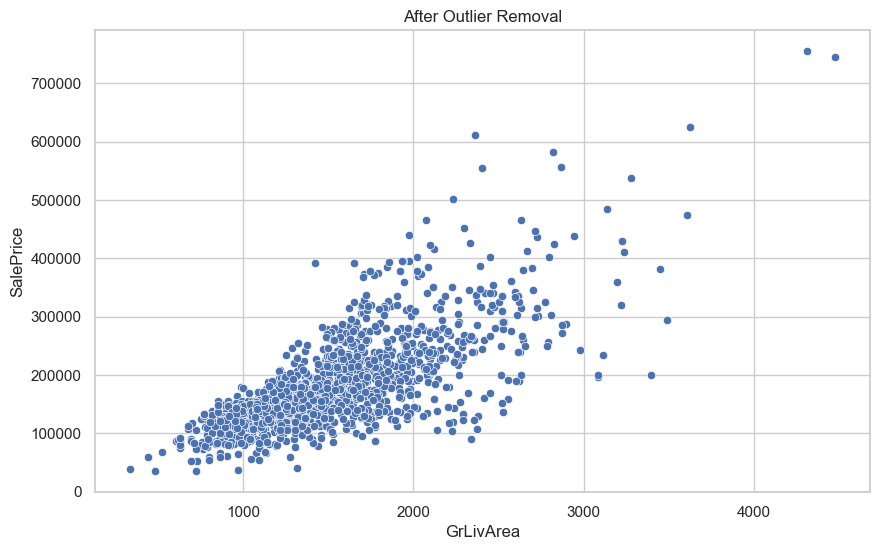

In [5]:
# Remove outliers with very large GrLivArea and low SalePrice
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

# Double-check after removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("After Outlier Removal")
plt.show()


## 🔁 Optional: Log Transform GrLivArea or Other Skewed Features


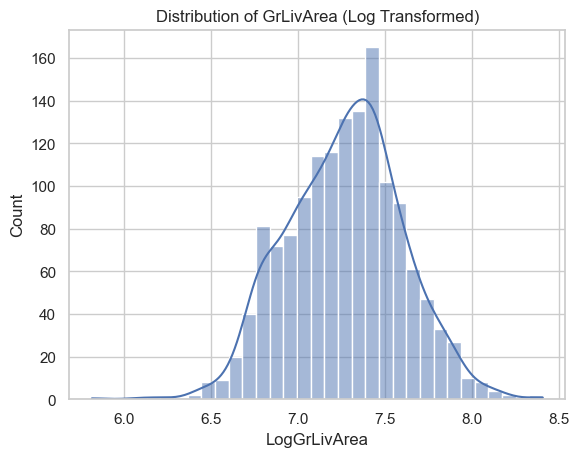

In [6]:
df['LogGrLivArea'] = np.log1p(df['GrLivArea'])

sns.histplot(df['LogGrLivArea'], kde=True)
plt.title("Distribution of GrLivArea (Log Transformed)")
plt.show()


In [7]:
df.to_csv("../data/cleaned_transformed.csv", index=False)


## ✅ Summary

- Applied log transformation to `SalePrice` and `GrLivArea`
- Removed extreme outliers based on scatterplot analysis
- Saved cleaned dataset for modeling (Day 3)
